# Rozkład według wartości osobliwych

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
import scipy

**Zadanie 1.**

Zastosowanie SVD do przeprowadzenia aproksymacji typu TLS.
W tym zadaniu wykorzystamy dane ze zbioru auto-mpg. Kod rozwiązujący problem TLS znajdziesz poniżej. Twoim zadaniem jest:
* Zapoznanie się ze sposobem działania kodu przeprowadzającego aproksymację TLS
* Porównanie wyników otrzymanych z metody TLS i OLS (np. poprzez narysowanie dwóch krzywych na jednym wykresie)

**Uwaga**: Poniżej nie znajdziesz kodu przeprowadzającego aproksymację OLS. Musisz napisać go samodzielnie. 

Dane do wykorzystania w tym ćwiczeniu znajdują się w pliku `auto_data2023.dat`. Jest to zmodyfikowana wersja zbioru auto-mpg dostępnego w repozytorium UCI.
Dane są zapisane w kolumnach:
* kolumna 0 - zużycie paliwa w milach/galon - `y1`
* kolumna 1 - pojemnosć skokową silnika     - `x` (zmienna niezależna)
* kolumna 2 - moc silnika                   - `y2`
* kolumna 3 - masa samochodu                - `y3`

Ponieważ dane pochodzą z USA, wszystkie pomiary są wyrażone w **miarach imperialnych** (cale, mile, galony).


In [6]:
import numpy as np

def tls(X, Y):
    # TLS - classical Total Least Square algorithm:
    m, n = X.shape  # n is the width of X (X is m by n)
    Z = np.concatenate((X, Y), axis=1)  # Z is X augmented with Y.
    U, S, V = np.linalg.svd(Z)  # find the SVD of Z.
    VXY = V[:n, n:]  # Take the block of V consisting of the first n rows and the n+1 to last column
    VYY = V[n:, n:]  # Take the bottom-right block of V.
    B = -VXY @ np.linalg.inv(VYY)
    return B



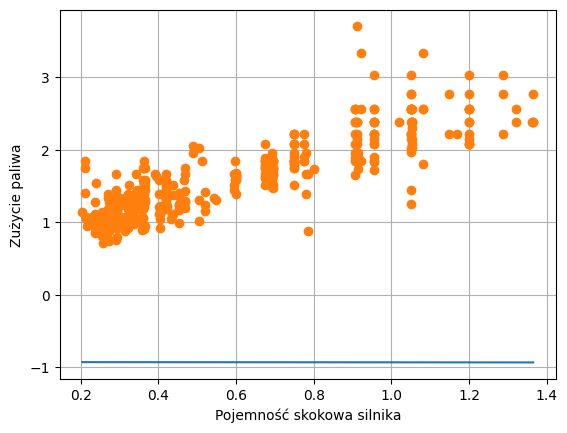

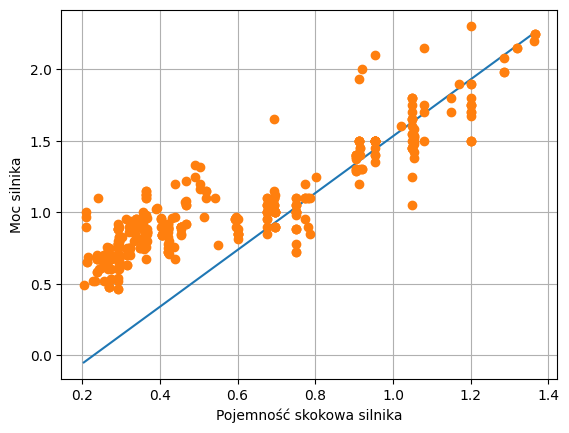

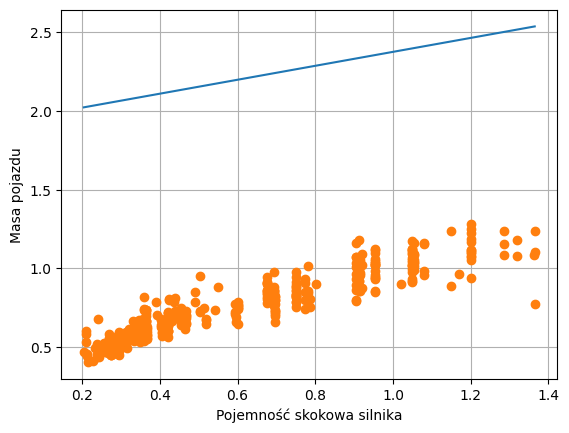

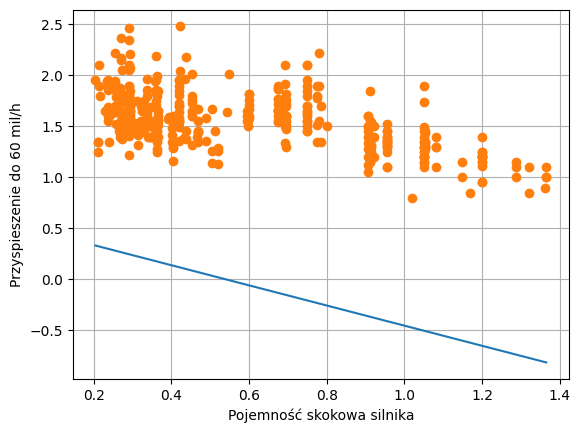

[[-0.92572014 -0.45606543  1.9327169   0.53300366]
 [-0.00333276  1.98794889  0.44250858 -0.98773772]]


In [7]:
# Skrypt wczytuje dane zapisane w kolumnach i oblicza współczynniki afinicznych funkcji y1(x),...,y4(x) aproksymujących dane
# y1,...,y4 (traktowane jako zależne)

A = np.loadtxt('auto_data2023.dat')
Skala = np.diag([30, 3, 10, 0.25, 100]) / 1000
A = A@ Skala


# Wersja z odwrotnością spalanie, tj. wyrażoną w galonach/milę
# Odwrotność spalania
A[:, 0] = A[:, 0]**(-1)

# Uporządkowanie kolumn macierzy danych: [x, y1, y2, y3, y4]
# Swap kolumn 1 i 2: % poj.silnika w 1. kolumnie, za nią zmienneobjaśniane

A[:, [1, 0]] = A[:, [0, 1]]
ind_x = 0  # kolumna z zmienną objaśniającą
ind_y = [1, 2, 3, 4]  # kolumny z zmiennymi objaśnianymi
rows, cols = A.shape
X = np.column_stack((np.ones(rows), A[:, ind_x]))  # afiniczna funkcja aproksymująca
Y = A[:, ind_y]  # zmienne objaśniane
a = tls(X, Y)  # rozwiązanie zadania TLS

# Wykresy danych i prostych aproksymujących (wykresy od numeru fig+1):
xmin = np.min(A[:, ind_x]) 
xmax = np.max(A[:, ind_x])
xx = np.linspace(xmin, xmax, 100)

titles = ['Zużycie paliwa', 'Moc silnika', 'Masa pojazdu', 'Przyspieszenie do 60 mil/h']
for i in range(4):
    a0 = a[0, i]
    a1 = a[1, i]
    yy = a0 + a1 * xx
    plt.figure()
    plt.plot(xx, yy, A[:, ind_x], A[:, ind_y[i]], 'o')
    plt.xlabel('Pojemność skokowa silnika')
    plt.ylabel(titles[i])
    plt.grid()
    plt.savefig(f's_{i}.png')

plt.show()
print(a)


**Zadanie 2.**

Wykorzystanie rozkładu SVD do kompresji czarno-białych obrazków.

Obrazek w skali szarości to tablica pikseli. Jeżeli jasność/kolor pikseli wyrazimy w skali szarości, to taki obrazek możemy potraktować jako zwykłą macierz. A zatem możliwe jest przeprowadzenie rozkładu SVD takiego rysunku/zdjęcia. Rozkład taki można wykorzystać do skompresowania informacji zawartych w macierzy. W tym celu, po przeprowadzeniu rozkładu, wybieramy $n$ **największych wartości osobliwych oraz związane z nimi lewo- i prawostronne wektory osobliwe** i przybliżamy oryginalną macierz [iloczynem diadycznym](https://pl.wikipedia.org/wiki/Iloczyn_diadyczny) tych wartości (czyli macierzami rzędu 1.).

Przygotowanie danych (szczegóły na zajęciach z uczenia maszynowego)

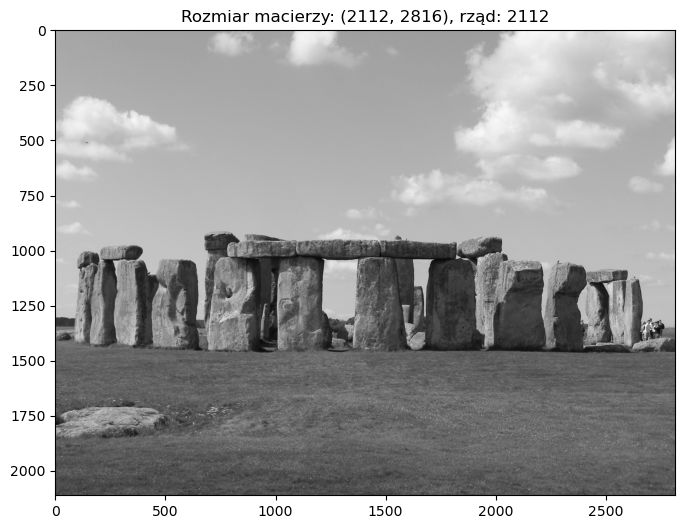

In [3]:
url = 'https://upload.wikimedia.org/wikipedia/commons/3/3c/Stonehenge2007_07_30.jpg'

# import obrazka i konwersja do 2D
imag = io.imread(url)
imag = color.rgb2gray(imag)

plt.figure(figsize=(8,8))
plt.imshow(imag,cmap='gray')
plt.title(f'Rozmiar macierzy: {imag.shape}, rząd: {np.linalg.matrix_rank(imag)}')
plt.show()

**Rozkład SVD**

In [7]:
# rozkład według wartości osobliwych
U,s,Vt = np.linalg.svd(imag) # standardowo s jest wektorem wartości szczegółnych, a nie macierzą.

array([1.40977111e+03, 1.63661378e+02, 1.11667552e+02, ...,
       1.81202425e-02, 1.76933071e-02, 1.74015128e-02])

Informacja zapisana w pierwszej wartości szczególnej oraz związanych z nią wektorami lewo- i prawostronnym daje macierz o rzędzie 1. Wymiary tej macierzy odpowiadają wymiarom obrazka (wynika to z użycia iloczynu diadycznego).

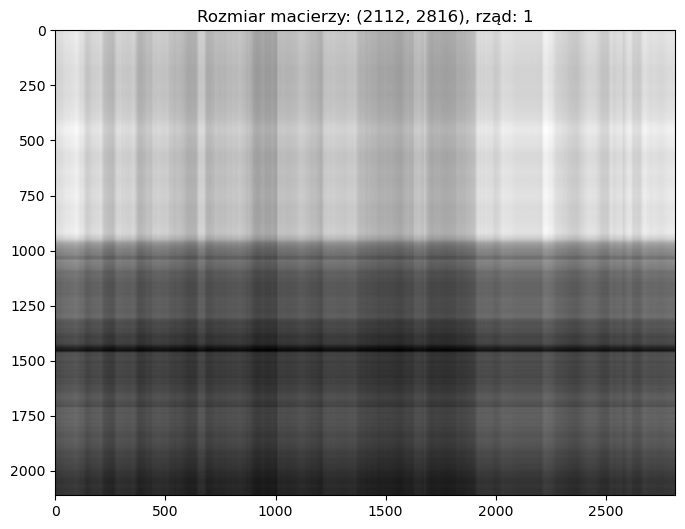

In [11]:
first = np.outer(U[:,0],Vt[0,:])*s[0]
plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {first.shape}, rząd: {np.linalg.matrix_rank(first)}')
plt.imshow(first,cmap='gray')

**Zadanie**

Wyświetl kilka pierwszych macierzy otrzymanych z iloczynów diadycznych kolejnych wartości osobliwych i związanych z nimi wektorów

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowa macierz (można podstawić własną np. z obrazu)
A = np.random.rand(10, 10)

# SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Liczba składników do wyświetlenia
k = 5

# Wyświetlenie pierwszych k macierzy rzędu 1 (iloczyny diadyczne)
for i in range(k):
    sigma_i = S[i]
    u_i = U[:, i].reshape(-1, 1)
    v_i = VT[i, :].reshape(1, -1)
    rank1_matrix = sigma_i * u_i @ v_i
    print(f"\nSkładnik {i+1} (σ = {sigma_i:.3f}):")
    print(rank1_matrix)



Składnik 1 (σ = 5.271):
[[0.52757386 0.60123634 0.75158914 0.53972814 0.43714781 0.60372878
  0.44952167 0.43772942 0.60969789 0.4796532 ]
 [0.58722095 0.66921166 0.83656323 0.60074939 0.48657141 0.67198589
  0.50034424 0.48721877 0.67862987 0.53388242]
 [0.36156647 0.41205018 0.51509268 0.36989627 0.29959406 0.41375834
  0.30807433 0.29999265 0.4178492  0.32872462]
 [0.50867478 0.57969847 0.72466524 0.52039366 0.42148803 0.58210163
  0.43341862 0.4220488  0.58785691 0.46247076]
 [0.53875278 0.61397612 0.76751479 0.5511646  0.44641067 0.61652137
  0.45904672 0.4470046  0.62261697 0.48981672]
 [0.41684682 0.47504904 0.59384584 0.42645017 0.34539936 0.47701837
  0.3551762  0.3458589  0.48173469 0.37898374]
 [0.55029416 0.62712896 0.7839568  0.56297188 0.45597386 0.62972874
  0.4688806  0.45658051 0.63595492 0.50030977]
 [0.6259377  0.71333423 0.89171965 0.6403581  0.51865212 0.71629137
  0.53333302 0.51934216 0.72337341 0.56908245]
 [0.4240186  0.48322218 0.60406285 0.43378717 0.3513419

**Właściwa kompresja**

Aby przybliżyć oryginalny obrazek, musimy **dodać do siebie** kolejne macierze rzędu pierwszego 1. Poniżej suma pierwszych 5 takich macierzy.

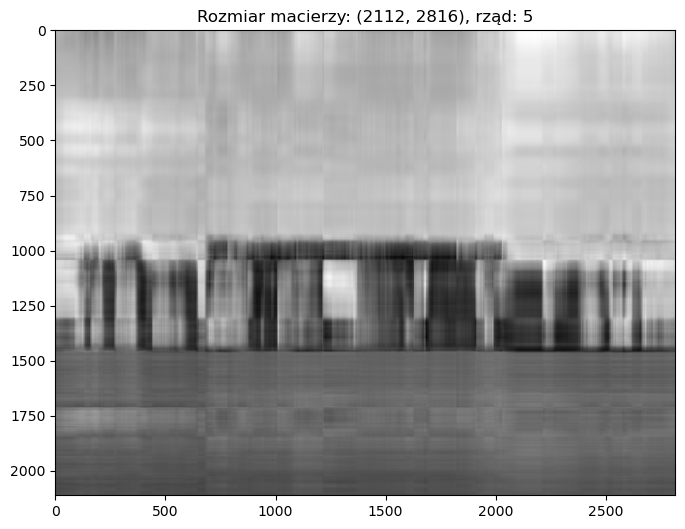

In [13]:
res = np.zeros(imag.shape)
for i in range(0,5):
    res += np.outer(U[:,i],Vt[i,:])*s[i]

plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res,cmap='gray')


**Zadanie**

Sprawdz rezultaty dla sumy mniejszej/większej liczby macierzy rzędu 1. Znajdź liczbę macierzy, dla której rozróżnienie przybliżenia od oryginału nie będzie możliwe (dla człowieka). Oblicz ile pamięci potrzeba do zapisania informacji niezbędnych do odtworzenia takiego przybliżenia (*pamiętaj, że zapamiętujemy wartości i wektory szczególne, a nie same macierze rzędu 1.*). Porównaj otrzymany wynik z rozmiarem org. obrazka. Jaki stopień kompresji udało Ci się osiągnąć?

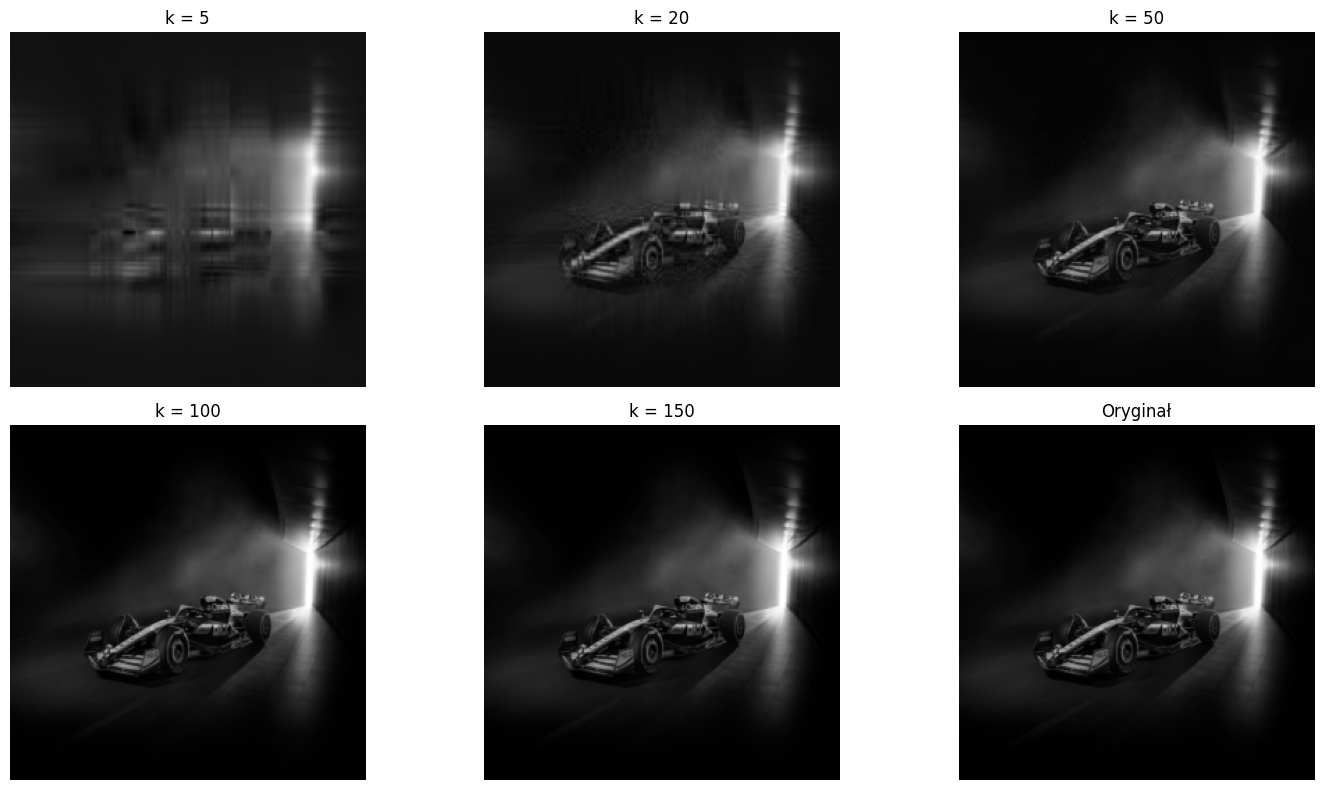


Oryginalny rozmiar: 65536 wartości (pikseli)
Rozmiar przybliżenia dla k=50: 25650 wartości
Stopień kompresji: 2.56x


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize

# Wczytanie i konwersja obrazu na skalę szarości (dowolny obraz z URL lub lokalny)
url = 'f1.jpg'
image = io.imread(url)
gray_image = color.rgb2gray(image)
gray_image = resize(gray_image, (256, 256), anti_aliasing=True)  # opcjonalne przeskalowanie

# SVD
U, S, VT = np.linalg.svd(gray_image, full_matrices=False)

# Funkcja: przybliżenie obrazu przez k składników
def svd_approx(U, S, VT, k):
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

# Wizualizacja dla różnych wartości k
k_values = [5, 20, 50, 100, 150]

plt.figure(figsize=(15, 8))
for i, k in enumerate(k_values):
    approx = svd_approx(U, S, VT, k)
    plt.subplot(2, 3, i+1)
    plt.imshow(approx, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

# Oryginał na końcu
plt.subplot(2, 3, 6)
plt.imshow(gray_image, cmap='gray')
plt.title("Oryginał")
plt.axis('off')
plt.tight_layout()
plt.show()

# Znalezienie najmniejszego k, dla którego oko ludzkie nie widzi różnicy
# (subiektywnie - załóżmy np. k=50)
k_best = 50
approx_best = svd_approx(U, S, VT, k_best)

# Rozmiar danych:
m, n = gray_image.shape
original_size = m * n
compressed_size = k_best * (1 + m + n)  # S: k wartosci, U: m×k, VT: k×n

compression_ratio = original_size / compressed_size

print(f"\nOryginalny rozmiar: {original_size} wartości (pikseli)")
print(f"Rozmiar przybliżenia dla k={k_best}: {compressed_size} wartości")
print(f"Stopień kompresji: {compression_ratio:.2f}x")


**Zadanie**

Powtórz eksperyment dla innego zdjęcia/rysunku. Powyższy kod zadziała dla dowolnego obrazka w formacie jpg. Aby zmienić rysunek należy zmienić adres w zmiennej `url`. Spróbuj znaleźć obrazki, dla których wymagane jest zapamiętanie mniejszej ilości informacji (*wskazówka: poszukaj obrazków zawierających powtarzające się wzory*).

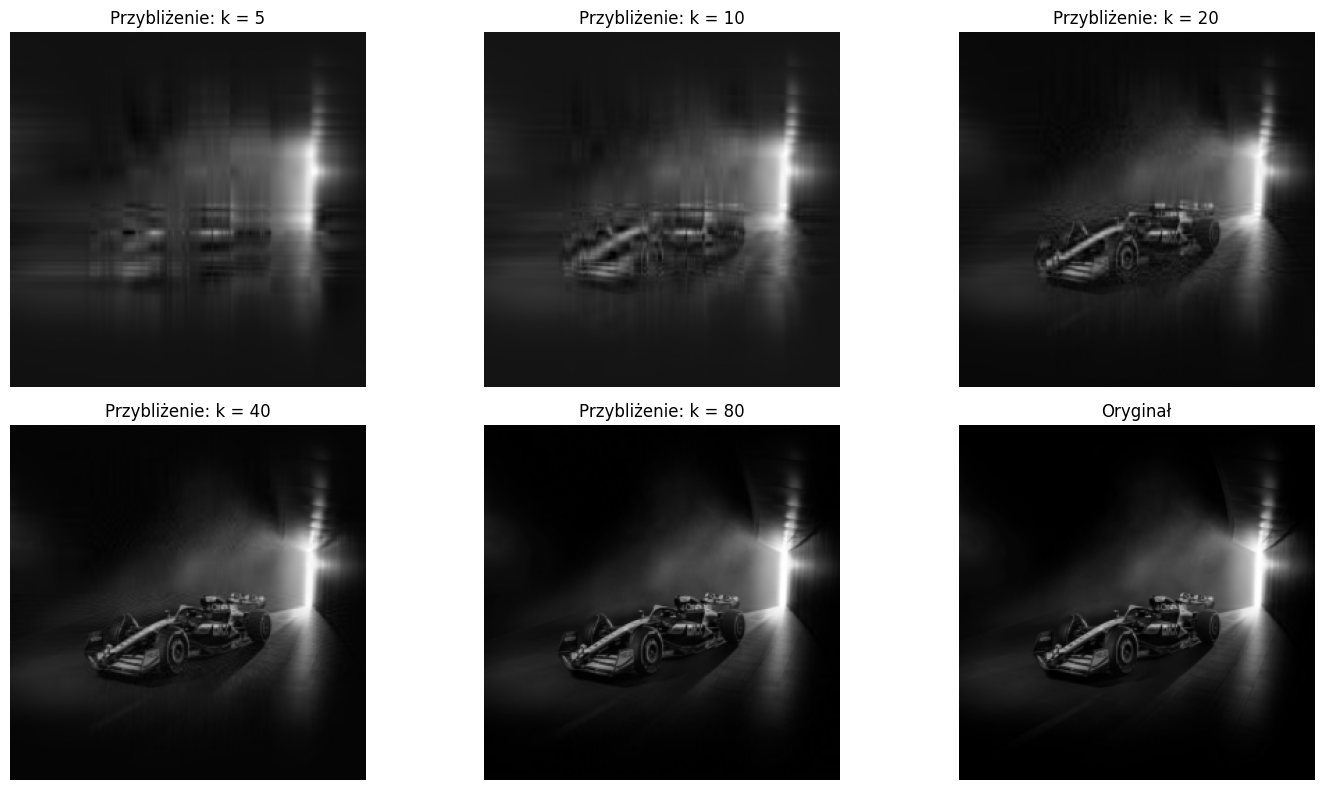

k=5   -> kompresja: 25.55x (rozmiar: 2565 zamiast 65536)
k=10  -> kompresja: 12.78x (rozmiar: 5130 zamiast 65536)
k=20  -> kompresja: 6.39x (rozmiar: 10260 zamiast 65536)
k=40  -> kompresja: 3.19x (rozmiar: 20520 zamiast 65536)
k=80  -> kompresja: 1.60x (rozmiar: 41040 zamiast 65536)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize

url = 'f1.jpg'

# Wczytanie i konwersja na skalę szarości
image = io.imread(url)
gray_image = color.rgb2gray(image)
gray_image = resize(gray_image, (256, 256), anti_aliasing=True)  # zmiana rozmiaru dla spójności

# SVD
U, S, VT = np.linalg.svd(gray_image, full_matrices=False)

# Funkcja do rekonstrukcji przy użyciu pierwszych k składników
def svd_approx(U, S, VT, k):
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

# Wartości k do testu
k_values = [5, 10, 20, 40, 80]

# Wizualizacja rekonstrukcji
plt.figure(figsize=(15, 8))
for i, k in enumerate(k_values):
    approx = svd_approx(U, S, VT, k)
    plt.subplot(2, 3, i+1)
    plt.imshow(approx, cmap='gray')
    plt.title(f"Przybliżenie: k = {k}")
    plt.axis('off')

# Oryginalny obraz
plt.subplot(2, 3, 6)
plt.imshow(gray_image, cmap='gray')
plt.title("Oryginał")
plt.axis('off')
plt.tight_layout()
plt.show()

# Kompresja i statystyki
m, n = gray_image.shape
for k in k_values:
    compressed_size = k * (1 + m + n)
    original_size = m * n
    ratio = original_size / compressed_size
    print(f"k={k:<3} -> kompresja: {ratio:.2f}x (rozmiar: {compressed_size} zamiast {original_size})")


**Zadanie**

Zastanów się nad bardziej poprawnymi (nie na oko) sposobami oceny jakości tej metody kompresji

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

url = 'f1.jpg'

# Wczytanie i przygotowanie obrazu
image = io.imread(url)
gray_image = color.rgb2gray(image)
gray_image = resize(gray_image, (256, 256), anti_aliasing=True)

# SVD
U, S, VT = np.linalg.svd(gray_image, full_matrices=False)

# Funkcja do rekonstrukcji z k składnikami
def svd_approx(U, S, VT, k):
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

# Funkcja do oceny jakości
def evaluate_quality(original, approx):
    mse = mean_squared_error(original, approx)
    psnr = peak_signal_noise_ratio(original, approx, data_range=1.0)
    ssim = structural_similarity(original, approx, data_range=1.0)
    return mse, psnr, ssim

# Sprawdź dla różnych k
k_values = [5, 10, 20, 50, 100, 150]
print(f"{'k':>3} | {'MSE':>10} | {'PSNR':>8} | {'SSIM':>6}")
print("-" * 36)
for k in k_values:
    approx = svd_approx(U, S, VT, k)
    mse, psnr, ssim = evaluate_quality(gray_image, approx)
    print(f"{k:>3} | {mse:10.6f} | {psnr:8.2f} | {ssim:6.4f}")


  k |        MSE |     PSNR |   SSIM
------------------------------------
  5 |   0.001541 |    28.12 | 0.8030
 10 |   0.000709 |    31.49 | 0.8885
 20 |   0.000216 |    36.65 | 0.9526
 50 |   0.000026 |    45.91 | 0.9892
100 |   0.000001 |    61.01 | 0.9993
150 |   0.000000 |    72.91 | 0.9999
